# [Pressure](https://www.youtube.com/watch?v=8tb3RLqY9Xo)

## Neutral pressure gauges

The calibrated data for the neutral pressure gauges is stored in the IOC shotfile. The gauges have a position and measuring direction that can change during vessel openings. Some gauges might not be available during some shots due to problems with the electronics. But when they work, they are a wonderful diagnostic.

In [1]:
from ipfnpytools.getsig import getsig
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [6]:
shotnr = 34532
f12 = getsig(shotnr, 'IOC', 'F12')
f18 = getsig(shotnr, 'IOC', 'F19')

In [31]:
f12.unit#LOL

''

The conversion from e/s/m-2 to Pa takes the ideal gas into account. You can derive it from a kinetic standpoint. The conversion factor is the following:

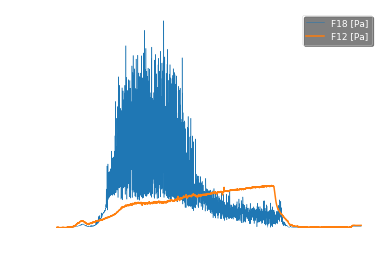

In [36]:
conv_factor = 1.5e23
plt.plot(f18.time, f18.data/conv_factor, label='F18 [Pa]', lw=0.5)
plt.plot(f12.time, f12.data/conv_factor, label='F12 [Pa]')
plt.ylabel('Pressure [Pa]')
plt.xlabel('time [s]')
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Baratrons

There are three baratron ports at AUG. The best description so far of this system is in Arne's [paper](https://iopscience.iop.org/article/10.1088/1361-6587/aaab21/meta). The data is stored in the `MSQ` shotfile.

In [37]:
from ipfnpytools.getsig import getsig
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

In [38]:
shotnr = 30733
bmid = getsig(shotnr, 'MSQ', 'Pre_MiPl')
bhfs = getsig(shotnr, 'MSQ', 'Pre_InDi')
blfs = getsig(shotnr, 'MSQ', 'Pre_OuDi')

In [39]:
blfs.unit

'mbar'

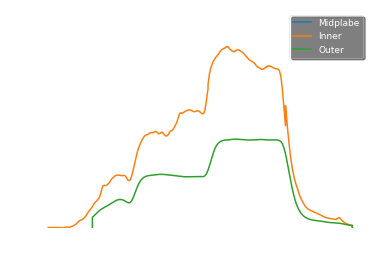

In [40]:
plt.plot(bmid.time, bmid.data*100, label='Midplabe')
plt.plot(bhfs.time, bhfs.data*100, label='Inner')
plt.plot(blfs.time, blfs.data*100, label='Outer')
plt.legend()
plt.ylabel('Pressure [Pa]')
plt.xlabel('time [s]')
plt.ylim(bottom=0)
plt.show()

## All the Pressure, [remixed](https://www.youtube.com/watch?v=IH-CyuXfC-Q)

Alexander Drenik's packages to handle pressure data also include Residual Gas Analysis.

To install all the packages you need to clone the several git repos:

* [pressure_gauge_data](ssh://git@gitlab.aug.ipp.mpg.de:2222/adrenik/pressure_gauge_data.git)
* [rga_min](git@gitlab.mpcdf.mpg.de:adrenik/rga_min.git)
* [rga_wrapper_raw](ssh://git@gitlab.aug.ipp.mpg.de:2222/adrenik/rga_wrapper_raw.git)
* [RGA_public](ssh://git@gitlab.aug.ipp.mpg.de:2222/adrenik/RGA_results_library_public.git)

And then run the following command under each folder to install the package:

`python setup.py --install user`

There is also an RGA tutorial:

* [RGA tutorial](https://github.com/sdrenik/rga_data_handling_tutorials.git)

In [41]:
import pressure_gauge_data as pgd
import matplotlib.pyplot as plt
plt.style.use('./Styles/darklab.mplstyle')

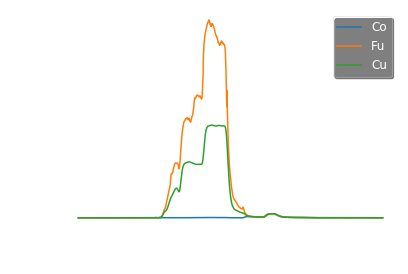

In [42]:
bar = pgd.baratrons(30733)
bar.plot_signals()

Or alternatively:

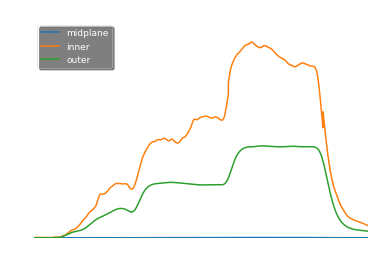

In [43]:
plt.plot(bar.joined_signals['Co'][0],bar.joined_signals['Co'][1]*100, label='midplane')
plt.plot(bar.joined_signals['Fu'][0],bar.joined_signals['Fu'][1]*100, label='inner')
plt.plot(bar.joined_signals['Cu'][0],bar.joined_signals['Cu'][1]*100, label='outer')
plt.xlim(0,9)
plt.ylim(0,6)
plt.xlabel('time [s]')
plt.ylabel('Pressure [Pa]')
plt.title('#30733',loc='left')
plt.legend(loc='best')
plt.show()